In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.1, 1, 100)
num = np.sin(5*np.pi*X)
#den = 
y = num/(5*np.pi*X)
Y = y

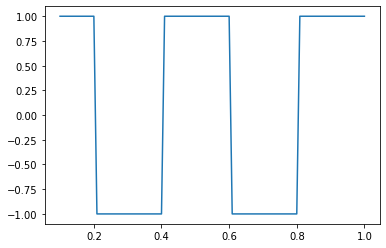

In [5]:
Y = np.sign(y)
plt.plot(X,Y)
plt.show()

In [6]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

X_t = torch.tensor(X, dtype = torch.float32)
y_t = torch.tensor(Y, dtype = torch.float32)
X_t = X_t.view(X_t.shape[0], 1)
y_t = y_t.view(y_t.shape[0], 1)


In [7]:
class func_simulator1(nn.Module):
    def __init__(self):
        super(func_simulator1, self).__init__()
        self.l1 = nn.Linear(1, 5)
        self.l2 = nn.Linear(5, 30)
        self.l3 = nn.Linear(30, 50)
        self.l4 = nn.Linear(50, 30)
        self.l5 = nn.Linear(30, 10)
        self.l6 = nn.Linear(10, 5)
        self.l7 = nn.Linear(5, 1)


    def forward(self, x):
        out = F.tanh(self.l1(x))
        out = F.tanh(self.l2(out))
        out = F.tanh(self.l3(out))
        out = F.tanh(self.l4(out))
        out = F.tanh(self.l5(out))
        out = F.tanh(self.l6(out))
        out = F.tanh(self.l7(out)) 
        return out

class func_simulator2(nn.Module):
    def __init__(self):
        super(func_simulator2, self).__init__()
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 30)
        self.l3 = nn.Linear(30, 10)
        self.l4 = nn.Linear(10, 1)

    def forward(self, x):
        out = F.tanh(self.l1(x))
        out = F.tanh(self.l2(out))
        out = F.tanh(self.l3(out))
        out = F.tanh(self.l4(out))
        return out

class func_simulator3(nn.Module):
    def __init__(self):
        super(func_simulator3, self).__init__()
        self.l1 = nn.Linear(1, 128)
        self.l2 = nn.Linear(128, 1)
        # self.l3 = nn.Linear(128, 30)
        # self.l4 = nn.Linear(30, 10)
        # self.l5 = nn.Linear(10, 1)

    def forward(self, x):
        out = F.tanh(self.l1(x))
        out = F.tanh(self.l2(out))
        # out = F.tanh(self.l3(out))
        # out = F.tanh(self.l4(out))
        # out = F.tanh(self.l5(out))
        return out

In [8]:
learning_rate,num_epochs    = 0.1,50000
model1                      = func_simulator1()
model2                      = func_simulator2()
model3                      = func_simulator3()
loss                        = nn.MSELoss()

In [9]:
# train on batch
def train_model(model, learning_rate, num_epochs):
    losses = []
    gradient                = torch.optim.SGD(model.parameters(),lr=learning_rate)
    for epoch in range(num_epochs):
        y_pred = model.forward(X_t)
        l = loss(y_pred,y_t)
        
        if(epoch+1)%1000==0:
#            print(f'epoch:{epoch+1},loss={l.item():.2e}')
            losses.append((epoch, l.item()))
        l.backward()
        # if epoch >= 35000:
        #     lr = 0.5*learning_rate
        gradient.step()
        gradient.zero_grad()
    y_bar = model(X_t).detach().numpy()
    return y_bar, np.array(losses)

Y1, L1 = train_model(model1, learning_rate, num_epochs)
Y2, L2 = train_model(model2, 0.1, num_epochs) 
Y3, L3 = train_model(model3, learning_rate, num_epochs) 

/Users/mengkel/Library/Python/3.9/lib/python/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


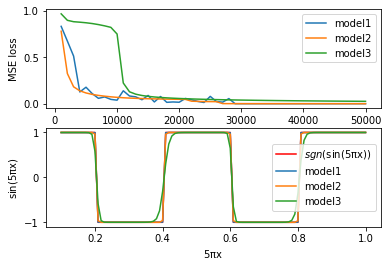

In [10]:
#fig = plt.figure(figsize=(6, 8))
plt.subplot(211)

plt.plot(L1[:,0], L1[:,1], label = 'model1')
plt.plot(L2[:,0], L2[:,1], label = 'model2')
plt.plot(L3[:,0], L3[:,1], label = 'model3')
plt.legend()
plt.ylabel('MSE loss')
plt.xlabel('Training Epoch')

plt.subplot(212)

plt.plot(X_t,y_t,'r', label = r'$sgn(\rm{sin(5\pi x)})$')
plt.plot(X_t,Y1, label = 'model1')
plt.plot(X_t,Y2, label = 'model2')
plt.plot(X_t,Y3, label = 'model3')

plt.xlabel(r'$\rm{5\pi x}$')
plt.ylabel(r'$\rm{sin(5\pi x)}$')
plt.legend()
plt.show()
#'''